<a href="https://colab.research.google.com/github/chacha86/pythonai2/blob/main/%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D_%EA%B0%9C%EC%9A%94.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
## 머신러닝 -> 기존의 데이터의 패턴을 분석해서 새로운 데이터를 예측하는 모델
## 지도 학습
### 회귀 -> 수치 예측
### 분류 -> 범주 예측


#### 학습지/정답
#### 시험지/정답


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [7]:
## 1. 데이터 로드
fish = pd.read_csv('/content/Fish.csv')


In [8]:
## 2. 탐색적 분석 (20%)
fish
fish.info()
fish.describe()

## 라인플롯, 바플롯, 스캐터플롯, 박스플롯, 히스토그램, 히트맵

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  159 non-null    object 
 1   Weight   159 non-null    float64
 2   Length1  159 non-null    float64
 3   Length2  159 non-null    float64
 4   Length3  159 non-null    float64
 5   Height   159 non-null    float64
 6   Width    159 non-null    float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB


,Weight,Length1,Length2,Length3,Height,Width
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
mean,398.326415,26.247170,28.415723,31.227044,8.970994,4.417486
std,357.978317,9.996441,10.716328,11.610246,4.286208,1.685804
min,0.000000,7.500000,8.400000,8.800000,1.728400,1.047600
25%,120.000000,19.050000,21.000000,23.150000,5.944800,3.385650
50%,273.000000,25.200000,27.300000,29.400000,7.786000,4.248500
75%,650.000000,32.700000,35.500000,39.650000,12.365900,5.584500
max,1650.000000,59.000000,63.400000,68.000000,18.957000,8.142000


<Axes: xlabel='Species', ylabel='Count'>

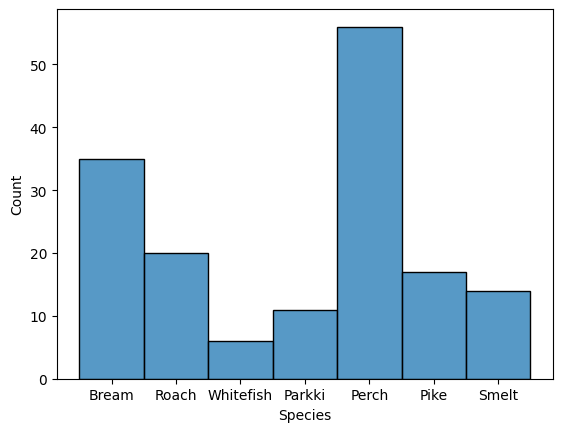

In [9]:

## 어종 분포
sns.histplot(data=fish, x='Species')

## 2개의 어종 선별 -> perch, bream

## 특성 2개만 선정 -> Weight, Length1
## 상관계수 분석 -> 두 변수간의 관계를 수치로 나타냄
## 특성을 선택하는 좋은 방법 -> 풍부한 전문 지식



In [10]:
## 상관계수 매트릭스
fish.corr()

<ipython-input-10-e62245789dcb>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  fish.corr()


,Weight,Length1,Length2,Length3,Height,Width
Weight,1.000000,0.915712,0.918618,0.923044,0.724345,0.886507
Length1,0.915712,1.000000,0.999517,0.992031,0.625378,0.867050
Length2,0.918618,0.999517,1.000000,0.994103,0.640441,0.873547
Length3,0.923044,0.992031,0.994103,1.000000,0.703409,0.878520
Height,0.724345,0.625378,0.640441,0.703409,1.000000,0.792881
Width,0.886507,0.867050,0.873547,0.878520,0.792881,1.000000


In [11]:
bream_perch = fish.loc[(fish['Species'] == 'Bream') | (fish['Species'] == 'Perch')]
bream_smelt = fish.loc[(fish['Species'] == 'Bream') | (fish['Species'] == 'Smelt')]

<Axes: xlabel='Length1', ylabel='Weight'>

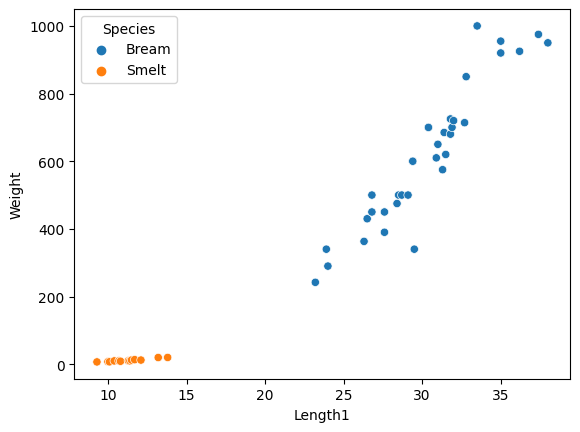

In [12]:
# 산점도로 두 변수의 관계 표현
sns.scatterplot(data=bream_smelt, x='Length1', y='Weight', hue='Species')

In [23]:
## 3. 데이터 전처리 (결측치 처리) (60%)
## 3.1 학습용 데이터와 테스트용 데이터 분리
### 7:3,  7.5:2.5,   8:2
from sklearn.model_selection import train_test_split ## 데이터를 학습용과 테스트용으로 분리해주는 함수


## 3.2 학습 데이터와 정답 데이터 분리
train = bream_smelt[['Weight', 'Length1']]
test = bream_smelt['Species']

trd, tsd, trt, tst = train_test_split(train, test, train_size=0.8, random_state=42)

print(trd.shape, tsd.shape)

# 4.피처 엔지니어링


(39, 2) (10, 2)


In [29]:
## 5. 학습 -> 모델(알고리즘)
### 최근접 이웃
from sklearn.neighbors import KNeighborsClassifier

knc = KNeighborsClassifier() ## 최근접 이웃 분류 모델

knc.fit(trd, trt) # 학습데이터와 정답데이터를 이용해서 모델이 학습하는 함수


## 6. 평가 (10%)
knc.predict([[240, 30]]) # 주어진 데이터를 예측하는 함수

knc.score(tsd, tst) # 주어진 데이터를 얼마나 잘 학습하였는지 수치화


## 7. 튜닝 ()

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


1.0